# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

In [11]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples

In [12]:
# Select three indices of your choice you wish to sample from the dataset
indices = [20, 274, 376]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17546,4519,4602,1066,2259,2124
1,894,1703,1841,744,759,1153
2,3136,8630,13586,5641,4666,1426


- The first customer I've chosen (sample n°20) bought a lot of fresh food (right above the 75th percentile of the overall fresh purchases) and an amount of other items that is roughly around the median value for each, so we can assume it must be some kind of market / supermarket that has already a good amount of groceries in stock and needs to replenish its stock of fresh. 
- The second one (sample n°274) buys a more limited amount of all sorts of items (below the 25th percentile for fresh, milk, grocery and frozen, and an amount of delicatessen and detergents that is roughly around the mean), so it must corrspond to smaller size estalishement such as a bar, cafe of convenience store. 
- The third one (sample n°376) bought lot of groceries, milk, frozen and detergents (above the 75th percentile), a 'median' amount of delicatessen and not so much fresh food (below the 25th percentile of overall), so it must be some kind of restaurant that cannot have too much fresh food in stock.

### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we implement the following:
 - Assign `new_data` a copy of the data by removing a random feature using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis=1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=3)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=7)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.618448585347


I attempted to predict the 'Grocery' feature because it seems to have a high variance given the 3 different profile of customers that I have chosen. I got a 0.62 as a prediction score, which seems reasonable and can lead us to say that this feature fits the data 'correctly'. It suggests that the other features correlate rather well with this one, and that it does not provide much "additional" information compared to the features already there. A feature providing a smaller R2 coefficient here would suggest that it cannot be predicted from the other features and therefore is more critical in understanding our customer profiles.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data

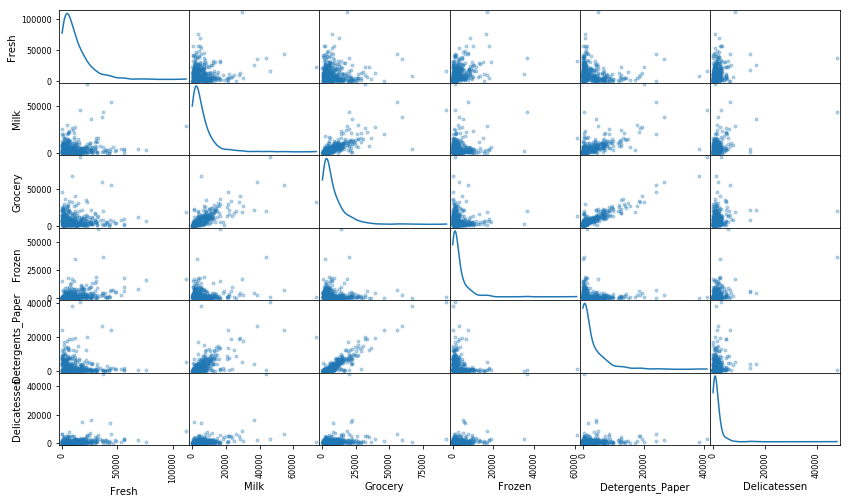

In [14]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

We can see from the scatter plots above that there are a few 'obvious' correlations:
    - 'Grocery' and 'detergents_paper' seem pretty well-correlated
    - 'Grocery' and 'milk' as well
    - 'Detergents_paper' and 'milk' is a less obvious correlation but we can identify a kind of linear pattern here
    
It confirms that the feature I have chosen above (grocery) seems not to be that relevant to identify customer profiles. As it correlates pretty well with two other features, we have 3 features that bring us an 'equal' amount of information here. 
About the distributions, we can see that they are really skewed to the left for each one of the features (instead of following a rather 'normal' distribution), which suggests that some outliers that skew the data need to be removed, as they are not represe,tative of the global trend. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, we implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling, using the `np.log` function
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling

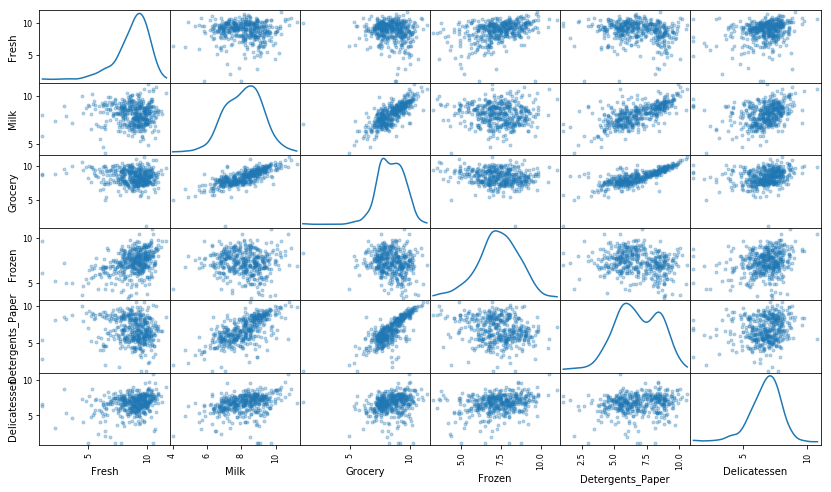

In [15]:
# Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal.

In [16]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
1,6.795706,7.440147,7.518064,6.612041,6.632002,7.050123
2,8.050703,9.063000,9.516795,8.637817,8.448057,7.262629


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`, using `np.percentile`.
 - Assign the value of the 75th percentile for the given feature to `Q3`, using `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [18]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print "Q1: '{}'   Q3: '{}'  Step: '{}'".format(Q1, Q3, step)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points we wish to remove
outliers  = [65, 66, 75, 81, 95, 96, 128, 154, 161, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

# Remove the outliers above
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Q1: '8.04805870221'   Q3: '9.73706394795'  Step: '2.53350786861'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Q1: '7.33498124004'   Q3: '8.88048008859'  Step: '2.31824827282'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Q1: '7.67461620137'   Q3: '9.27385367724'  Step: '2.3988562138'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Q1: '6.60967774917'   Q3: '8.17589608318'  Step: '2.34932750101'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Q1: '5.54810142479'   Q3: '8.27434059875'  Step: '4.08935876094'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Q1: '6.01187465693'   Q3: '7.50672842655'  Step: '2.24228065442'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Below are outliers:
    - sample n°75 for both groceries and detergents
    - sample n°154 for milk, groceries and delicatessen
    - sample n°65 for fresh and frozen
    - sample n°66 for delicatessen and fresh
    - sample n°128 for delicatessen and fresh    

All of the above are listed because the values they present are either really high or really low given the IQR, and therefore skew the results. We would like to consider 'typical' profiles of customers in order to fit a new one to a group: in order to do that we need to remove the skew induced by those outliers and get a rather 'normal' distribution of the data for all of the features. That is why I listed all the outliers from the fresh feature (which is in my opinion really skewed to the right in the plots above), as well as the 5 outliers listed above.  


## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

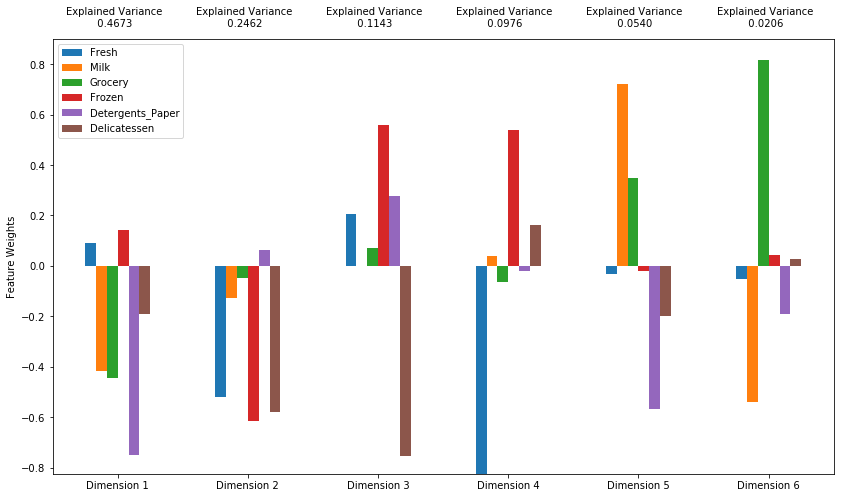

In [9]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

The first and second principal components explain 71,35% of the total variance in the data, and that amount rises up to close to 1 (exactly 92,54%) when we use the first 4 components.

Detergents_paper, groceries and milk are well represented in the first dimension, whereas delicatessen, frozen and fresh are left off: this might itself represent a category of customers corresponding to supermarkets. The second dimension brings information about the left-off features in the first dimension, which are delicatessen, frozen and fresh. It seems to correspond to the 'restaurant' type of profile. In the third dimension, emphasis is put towards frozen, detergents and delicatessen, whereas there is smaller amount of information about the other categories: this seems to correspond to smaller stores. Finally, the fourth dimension seems to favor fresh and frozen, which seems to correspond to frozen-food stores.

### Observation
We can now observe how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9801,-0.7361,-0.4981,-0.7709,-0.5363,-0.3709
1,0.4503,1.4764,-1.2201,1.4296,-0.7130,-0.2696
2,-2.1162,-0.7220,0.6576,1.4206,-0.0026,0.1787


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
We can now observe how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9801,-0.7361
1,0.4503,1.4764
2,-2.1162,-0.7220


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

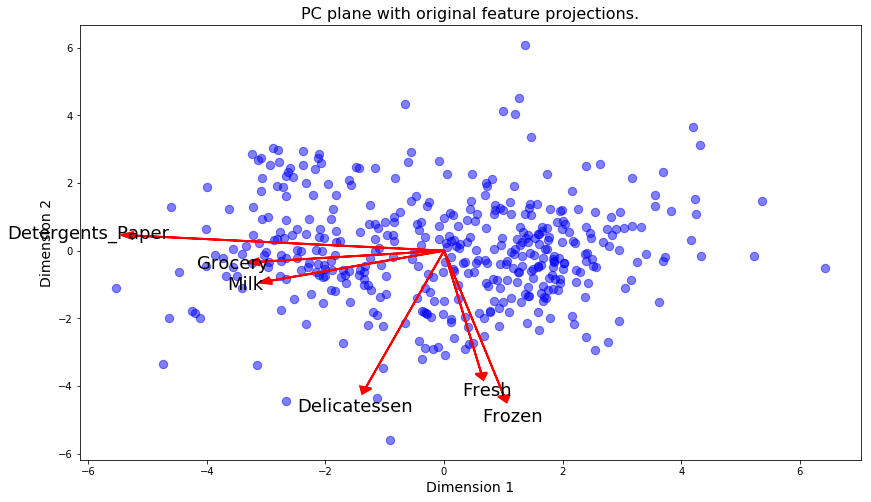

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

As guessed earlier, we can see from the graph above that groceries and milk are quite well correalted with the principal component detergents_paper. Fresh and frozen also seem to be well correlated in the other dimension. The results confirm what we found in the pca_results figure, which is one dimension bringing info about detergents, groceries and milk, the other comprising fresh and frozen, delicatessen being 'rather' equally split between the two.

## Clustering

In this section, we can choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

The K-Means clustering algorithm works well (and fast) in cases where the clusters to be formed are distinct and separable, the result being each sample belonging to one cluster or another (its bounds are rigid). The Gaussian Mixture Model is a method of soft-clustering, which means each point, given its position towards the clusters' 'centers', has a probability of belonging to each one of the clusters. In our case, as we have a kind of cloudish scatter plot above, we will go for the gaussian mixture clustering.


### Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print score

0.426741873917


I tried 2 to 10 cluster numbers, 2 clusters providing the best silhouette score of 0.43 (2 clusters being the initial guess given the scatter plot above) and above n_clusters=2, the scores tend to stabilize around a 0.3 value.

### Cluster Visualization
Now we have chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. 

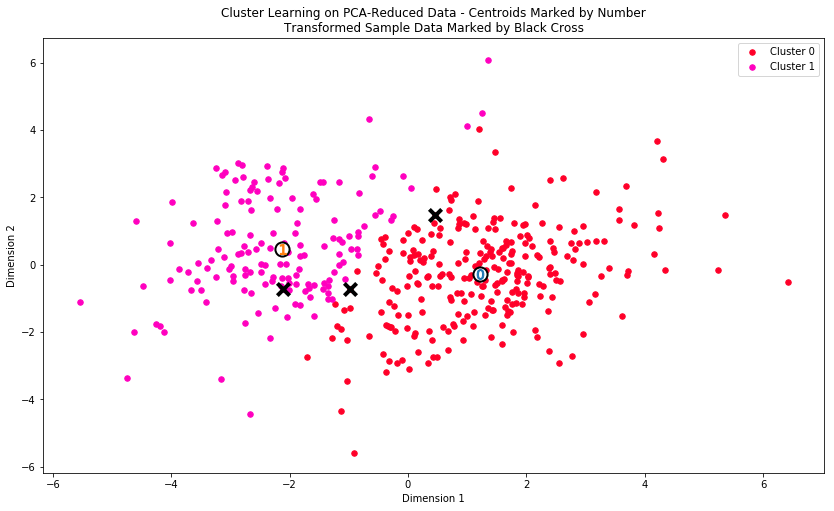

In [15]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9504.0,2107.0,2717.0,2213.0,348.0,759.0
Segment 1,4801.0,7766.0,11652.0,868.0,4478.0,930.0


Segment 0 most likely represents supermarkets, as the volumes here are quite high and as the milk and groceries values vastly exceed the overall means observed at the beginning of the project. The overall volume of segment 1 gets below the overall mean volume, whilst getting important amounts of fresh and frozen food, so this must represent the restaurants category.

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


- The first customer I've chosen (sample n°20) bought a lot of fresh food (right above the 75th percentile of the overall fresh purchases) and an amount of other items that is roughly around the median value for each. This sample's fit is unclear as the overall volume is huge, but given the fact that it bought a big amount of fresh and frozen food, it was fit in the 'restaurants' cluster, whereas I would have put it in the supermarkets category.

- The second one (sample n°274) bought a more limited amount of all sorts of items (below the 25th percentile for fresh, milk, grocery and frozen, and an amount of delicatessen and detergents that is roughly around the mean). My initial guess was a cafe or bar, therefore it fits in the restaurant category.

- The third one (sample n°376) bought lot of groceries, milk, frozen and detergents (above the 75th percentile), a 'median' amount of delicatessen and not so much fresh food (below the 25th percentile of overall). It is therefore logical to be fit in the cluster 1 catgory (supermarkets).


## Conclusion

If you know what the 'typical' customer for each cluster is, you can either run an A/B test on each one of them and extrapolate the results to all the data points in their respective clusters, or, you can guess what their profile is (supermarket, restaurant, ...) and imagine more easily what the consequences of changing the delivery service would be. For example, it is safe to assume that a restaurant relying on a daily fresh food delivery would not be so happy to see the service level drop.  

We could produce an extended dataset with more columns that would contain ratios of the amount spent on each product category over the overall amount spent, with a label 'segmentX' or 'segmentY' given the cluster the data sample fits in from the study above. That way, using a supervised learner, we could easily determine the profile of a new customer and label it accordingly.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

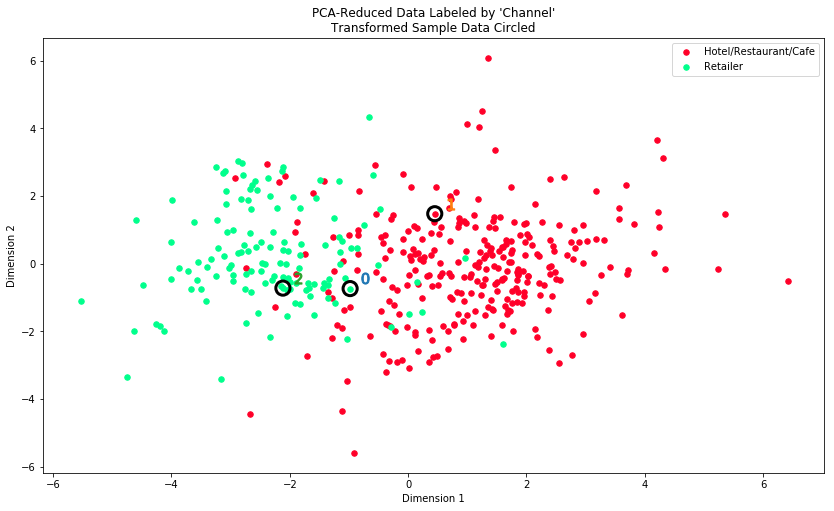

In [18]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

The supermarkets (retailers) vs. restaurants distrbution in 2 clusters was my guess given the results obtained throughout the project (silhouette score) so these classifications are quite consistent with this guess. The plot above confirms my doubts about sample 0, which was fit in the restaurants category by my clustering and is indeed a retailer (the overall amounts seemed huge for a restaurant). The point is right inbetween clusters so at an unclear position. With 2 over 3 points fitting in the right category, we can consider tthat we were right about the trends and customer profiles. As there is a large 'mix' zone inbetween clusters, it is difficult to fit those points in a category. But for all the other points (on the far left and far right side of the plot), we can safely assume that they belong purely to one category or the other